# Projeto-4

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from datetime import datetime


### Leitura do arquivo e tratamento dos dados

In [2]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=True)
df_gas.info()
#teste

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   DATA INICIAL                   120823 non-null  object 
 1   DATA FINAL                     120823 non-null  object 
 2   REGIÃO                         120823 non-null  object 
 3   ESTADO                         120823 non-null  object 
 4   PRODUTO                        120823 non-null  object 
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64  
 6   UNIDADE DE MEDIDA              120823 non-null  object 
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64
 11  MARGEM MÉDIA REVENDA           120823 non-null  object 
 12  COEF DE VARIAÇÃO REVENDA      

In [3]:
df_gas = pd.read_csv('2004-2021.tsv', sep='\t', parse_dates=['DATA INICIAL', 'DATA FINAL'])
df_gas['ANO'] = df_gas['DATA FINAL'].dt.year
df_gas['MÊS'] = df_gas['DATA FINAL'].dt.month
df_gas.head()


DATA INICIAL DATA FINAL        REGIÃO              ESTADO           PRODUTO  \
0   2004-05-09 2004-05-15  CENTRO OESTE    DISTRITO FEDERAL  ETANOL HIDRATADO   
1   2004-05-09 2004-05-15  CENTRO OESTE               GOIAS  ETANOL HIDRATADO   
2   2004-05-09 2004-05-15  CENTRO OESTE         MATO GROSSO  ETANOL HIDRATADO   
3   2004-05-09 2004-05-15  CENTRO OESTE  MATO GROSSO DO SUL  ETANOL HIDRATADO   
4   2004-05-09 2004-05-15      NORDESTE             ALAGOAS  ETANOL HIDRATADO   

   NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
0                           127              R$/l                1.288   
1                           387              R$/l                1.162   
2                           192              R$/l                1.389   
3                           162              R$/l                1.262   
4                           103              R$/l                1.181   

   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
0                  0.016                  1.19                 1.350   
1                  0.114                  0.89                 1.449   
2                  0.097                  1.18                 1.760   
3                  0.070                  1.09                 1.509   
4                  0.078                  1.05                 1.400   

  MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA PREÇO MÉDIO DISTRIBUIÇÃO  \
0                0.463                     0.012                    0.825   
1                0.399                     0.098                    0.763   
2                0.419                     0.070                     0.97   
3                0.432                     0.055                     0.83   
4                 0.24                     0.066                    0.941   

  DESVIO PADRÃO DISTRIBUIÇÃO PREÇO MÍNIMO DISTRIBUIÇÃO  \
0                       0.11                    0.4201   
1                      0.088                    0.5013   
2                      0.095                    0.5614   
3                      0.119                    0.5991   
4                      0.077                    0.7441   

  PREÇO MÁXIMO DISTRIBUIÇÃO COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
0                    0.9666                         0.133  2004    5  
1                      1.05                         0.115  2004    5  
2                     1.161                         0.098  2004    5  
3                   1.22242                         0.143  2004    5  
4                    1.0317                         0.082  2004    5

In [67]:
df_gas.tail()

DATA INICIAL DATA FINAL    REGIÃO          ESTADO          PRODUTO  \
120818   2021-04-25 2021-05-01     NORTE         RORAIMA  ÓLEO DIESEL S10   
120819   2021-04-25 2021-05-01       SUL  SANTA CATARINA  ÓLEO DIESEL S10   
120820   2021-04-25 2021-05-01   SUDESTE       SAO PAULO  ÓLEO DIESEL S10   
120821   2021-04-25 2021-05-01  NORDESTE         SERGIPE  ÓLEO DIESEL S10   
120822   2021-04-25 2021-05-01     NORTE       TOCANTINS  ÓLEO DIESEL S10   

        NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
120818                            12              R$/l                4.582   
120819                           100              R$/l                4.141   
120820                           886              R$/l                4.246   
120821                            33              R$/l                4.464   
120822                            18              R$/l                4.352   

        DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
120818                  0.056                 4.510                 4.690   
120819                  0.187                 3.838                 4.739   
120820                  0.216                 3.769                 5.199   
120821                  0.205                 4.190                 4.699   
120822                  0.156                 4.199                 4.699   

       MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
120818                  NaN                     0.012   
120819                  NaN                     0.045   
120820                  NaN                     0.051   
120821                  NaN                     0.046   
120822                  NaN                     0.036   

       PREÇO MÉDIO DISTRIBUIÇÃO DESVIO PADRÃO DISTRIBUIÇÃO  \
120818                      NaN                        NaN   
120819                      NaN                        NaN   
120820                      NaN                        NaN   
120821                      NaN                        NaN   
120822                      NaN                        NaN   

       PREÇO MÍNIMO DISTRIBUIÇÃO PREÇO MÁXIMO DISTRIBUIÇÃO  \
120818                       NaN                       NaN   
120819                       NaN                       NaN   
120820                       NaN                       NaN   
120821                       NaN                       NaN   
120822                       NaN                       NaN   

       COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
120818                           NaN  2021    5  
120819                           NaN  2021    5  
120820                           NaN  2021    5  
120821                           NaN  2021    5  
120822                           NaN  2021    5

In [4]:
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL' if (x =='OLEO DIESEL') else x)
df_gas['PRODUTO'] = df_gas['PRODUTO'].apply(lambda x: 'ÓLEO DIESEL S10' if (x =='OLEO DIESEL S10') else x)


In [59]:
df_gas.replace('-99999.0', np.nan, inplace=True)

In [5]:
df_gas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120823 entries, 0 to 120822
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   DATA INICIAL                   120823 non-null  datetime64[ns]
 1   DATA FINAL                     120823 non-null  datetime64[ns]
 2   REGIÃO                         120823 non-null  object        
 3   ESTADO                         120823 non-null  object        
 4   PRODUTO                        120823 non-null  object        
 5   NÚMERO DE POSTOS PESQUISADOS   120823 non-null  int64         
 6   UNIDADE DE MEDIDA              120823 non-null  object        
 7   PREÇO MÉDIO REVENDA            120823 non-null  float64       
 8   DESVIO PADRÃO REVENDA          120823 non-null  float64       
 9   PREÇO MÍNIMO REVENDA           120823 non-null  float64       
 10  PREÇO MÁXIMO REVENDA           120823 non-null  float64       
 11  

### Objetivos!!

- Observar e discutir a presença de outliers
- Observar o aumento bruto e percentual de cada combustivel em todo período.
- Observar a evolução do preço médio dos combustíveis por região.
- Observar a quantidade de postos pesquisados por estado em 2004 e a quantidade média de postos por estado em 2021 e traçar um grafico de linha com o total de postos pesquisados ano a ano.
- Mapa de calor com valor médio do preço dos combustíveis de cada estado.
- Mapa de calor com quantidade média de postos pesquisados por estado.

- Fazer o gráfico de spread dos combustíveis - A FAZER

- Observações:
- Há valores com -9999, devemos substituir por NaN?
- Gasolina Aditivada só temos valores entre 20-21, base de dados muito pequena em relação aos outros!

### Verificando a existencia de outliers no preço do produto, podemos observar nitidamente a discrepancia no valor do GLP em comparação dos outros

In [81]:
fig=px.box(data_frame=df_gas, y='PREÇO MÉDIO REVENDA', color='PRODUTO')
fig.update_layout(template='presentation')

Text(0.5, 1.0, 'Diesels10')

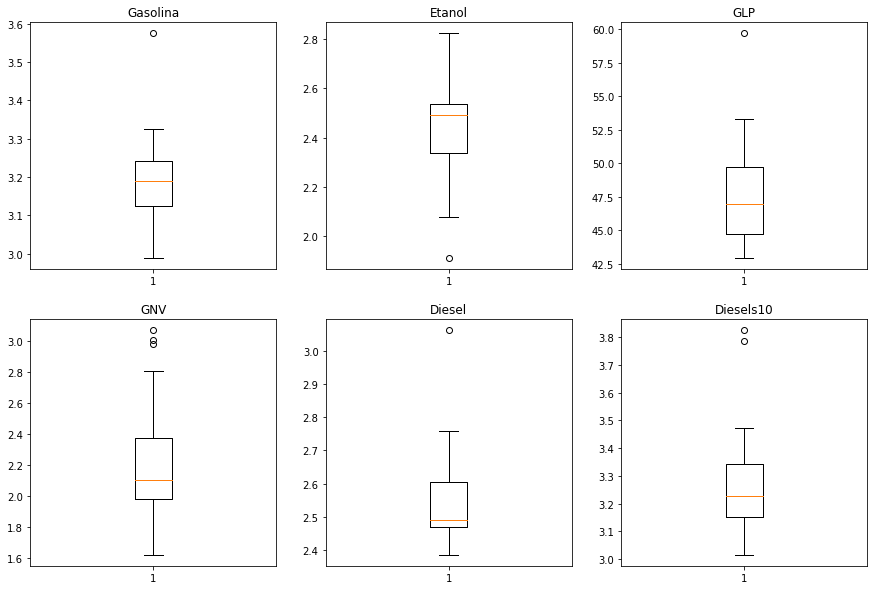

In [82]:
fig2, axs2 = plt.subplots(2, 3, figsize=(15,10))

valor_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
valor_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ESTADO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')


axs2[0,0].boxplot(valor_gasolina)
axs2[0,1].boxplot(valor_etanol)
axs2[0,2].boxplot(valor_glp)
axs2[1,0].boxplot(valor_gnv)
axs2[1,1].boxplot(valor_diesel)
axs2[1,2].boxplot(valor_diesels10)

axs2[0,0].set_title('Gasolina')
axs2[0,1].set_title('Etanol')
axs2[0,2].set_title('GLP')
axs2[1,0].set_title('GNV')
axs2[1,1].set_title('Diesel')
axs2[1,2].set_title('Diesels10');

In [88]:
df_precos_gasolina_c = df_gas.loc[df_gas["PRODUTO"]=='GASOLINA COMUM']

fig=px.box(data_frame=df_precos_gasolina_c, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GASOLINA COMUM',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [83]:
df_precos_glp = df_gas.loc[df_gas["PRODUTO"]=='GLP']

fig=px.box(data_frame=df_precos_glp, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title= 'GLP',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [84]:
df_precos_etanol = df_gas.loc[df_gas["PRODUTO"]=='ETANOL HIDRATADO']

fig=px.box(data_frame=df_precos_etanol, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ETANOL HIDRATADO',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [85]:
df_precos_gasolina_a = df_gas.loc[df_gas["PRODUTO"]=='GASOLINA ADITIVADA']

fig=px.box(data_frame=df_precos_gasolina_a, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GASOLINA ADITIVADA',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [89]:
df_precos_disel = df_gas.loc[df_gas["PRODUTO"]=='ÓLEO DIESEL']

fig=px.box(data_frame=df_precos_disel, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ÓLEO DIESEL',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [86]:
df_precos_disel_10 = df_gas.loc[df_gas["PRODUTO"]=='ÓLEO DIESEL S10']

fig=px.box(data_frame=df_precos_disel_10, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='ÓLEO DIESEL S10',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

In [87]:
df_precos_gnv = df_gas.loc[df_gas["PRODUTO"]=='GNV']

fig=px.box(data_frame=df_precos_gnv, y='PREÇO MÉDIO REVENDA', x= 'ANO', color='ANO')

fig.update_layout(
    title='GNV',
    autosize=False,
    width=1300,
    height=500,
    legend=dict(font=dict(size= 15)),
    template='presentation')

### - Evolução do preço médio dos combustíveis por região.

In [6]:
df_gas['REGIÃO'].unique()

array(['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'],
      dtype=object)

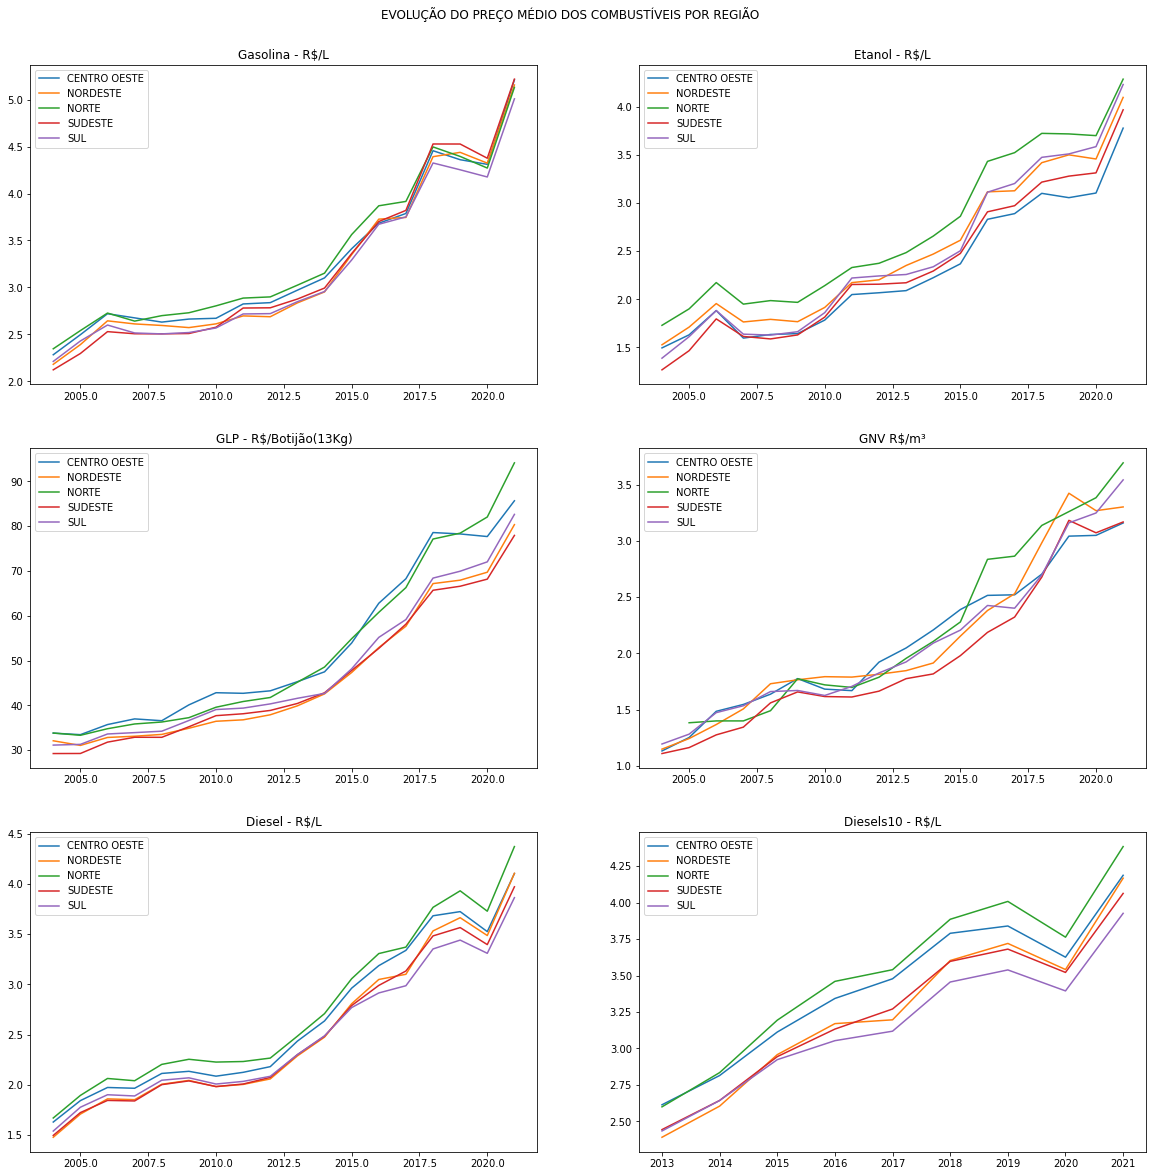

In [7]:
fig, axs = plt.subplots(3, 2, figsize=(20,20))
fig.suptitle('EVOLUÇÃO DO PREÇO MÉDIO DOS COMBUSTÍVEIS POR REGIÃO', fontsize=12, y=0.92)

df_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_etanol = df_gas[df_gas['PRODUTO']=='ETANOL HIDRATADO'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_glp = df_gas[df_gas['PRODUTO']=='GLP'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_gnv = df_gas[df_gas['PRODUTO']=='GNV'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesel = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
df_diesels10 = df_gas[df_gas['PRODUTO']=='ÓLEO DIESEL S10'].pivot_table(index='ANO', columns='REGIÃO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')

axs[0,0].plot(df_gasolina)
axs[0,1].plot(df_etanol)
axs[1,0].plot(df_glp)
axs[1,1].plot(df_gnv)
axs[2,0].plot(df_diesel)
axs[2,1].plot(df_diesels10)

axs[0,0].set_title('Gasolina - R$/L')
axs[0,1].set_title('Etanol - R$/L')
axs[1,0].set_title('GLP - R$/Botijão(13Kg)')
axs[1,1].set_title('GNV R$/m³')
axs[2,0].set_title('Diesel - R$/L')
axs[2,1].set_title('Diesels10 - R$/L')

axs[0,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[0,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[1,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,0].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left')
axs[2,1].legend(labels=['CENTRO OESTE', 'NORDESTE', 'NORTE', 'SUDESTE', 'SUL'], loc='upper left');

- Comentários:

- O Norte tem majoritariamente o maior preço dos diesels(comum e 10s) e do etanol e também do GNV a partir de 2015, do GLP a partir de 2018 e da gasolina entre 2008 e 2017. Com certeza é pior região em relação a preço.
- 

### Aumento bruto e percentual de cada combustivel em todo período.

##### Aumento bruto

In [119]:
aumento_produto = df_gas.pivot_table(index='ANO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
aumento_bruto_produto = ((df_gas.loc[df_gas["ANO"]==2021].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean() - df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean()))
aumento_bruto_produto = aumento_bruto_produto.to_frame()

aumento_bruto_produto['AUMENTO EM REAIS(R$)']=aumento_bruto_produto['PREÇO MÉDIO REVENDA'].round(decimals = 2)
aumento_bruto_produto.reset_index(inplace=True)
aumento_bruto_produto.drop(labels = [1,6],axis=0, inplace=True)

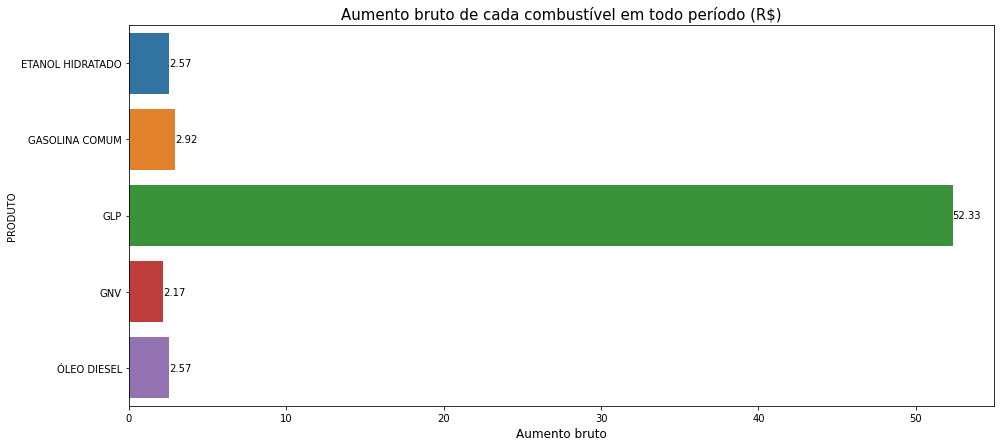

In [121]:
plt.figure(figsize=(15.5,7))
plt.title('Aumento bruto de cada combustível em todo período (R$)', size=15)
grafico_aumento_bruto = sns.barplot(data=aumento_bruto_produto, x='AUMENTO EM REAIS(R$)', y='PRODUTO')
grafico_aumento_bruto.set_xlabel("Aumento bruto", size = 12 ) 
grafico_aumento_bruto.bar_label(grafico_aumento_bruto.containers[0]);

##### Aumento percentual

In [104]:
aumento_produto = df_gas.pivot_table(index='ANO', columns='PRODUTO', values='PREÇO MÉDIO REVENDA', aggfunc='mean')
aumento_percentual_produto = ((df_gas.loc[df_gas["ANO"]==2021].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean() - df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean())/df_gas.loc[df_gas["ANO"]==2004].groupby(['PRODUTO'])["PREÇO MÉDIO REVENDA"].mean())*100
aumento_percentual_produto = aumento_percentual_produto.to_frame()
aumento_percentual_produto['AUMENTO PERCENTUAL'] = aumento_percentual_produto['PREÇO MÉDIO REVENDA'].astype('int64')
aumento_percentual_produto.reset_index(inplace=True)
aumento_percentual_produto.drop(labels = [1,6],axis=0, inplace=True)

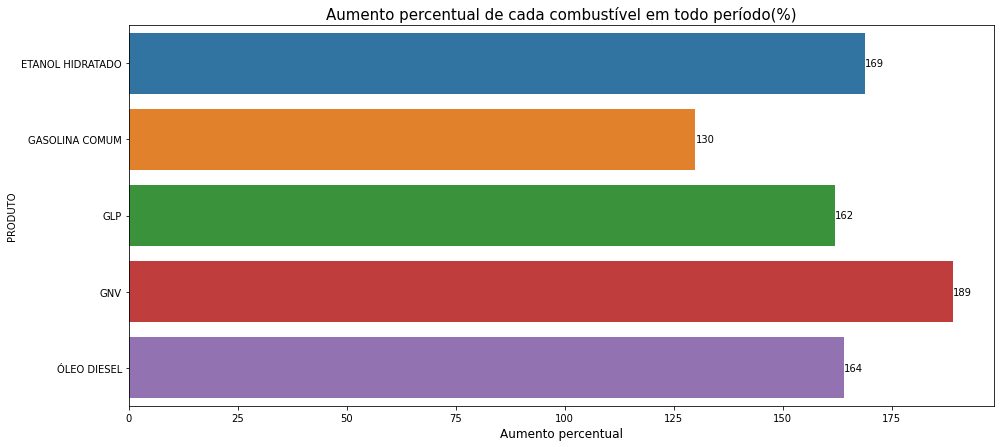

In [109]:
plt.figure(figsize=(15.5,7))
plt.title('Aumento percentual de cada combustível em todo período(%)', size=15)
grafico_aumento_percentual = sns.barplot(data=aumento_percentual_produto, x='AUMENTO PERCENTUAL', y='PRODUTO')
grafico_aumento_percentual.set_xlabel("Aumento percentual", size = 12 ) 
grafico_aumento_percentual.bar_label(grafico_aumento_percentual.containers[0]);

### Média da quantidade de postos pesquisado por estado em 2004 e 2021. Evolução ano a ano.

##### 2004

In [70]:
df_postos_2004 = df_gas.loc[df_gas['ANO']==2004]
df_postos_2004 = df_postos_2004.pivot_table(index='ESTADO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='mean').astype(int)
df_postos_2004 = df_postos_2004.sort_values(by='NÚMERO DE POSTOS PESQUISADOS')
df_postos_2004.reset_index(inplace = True)


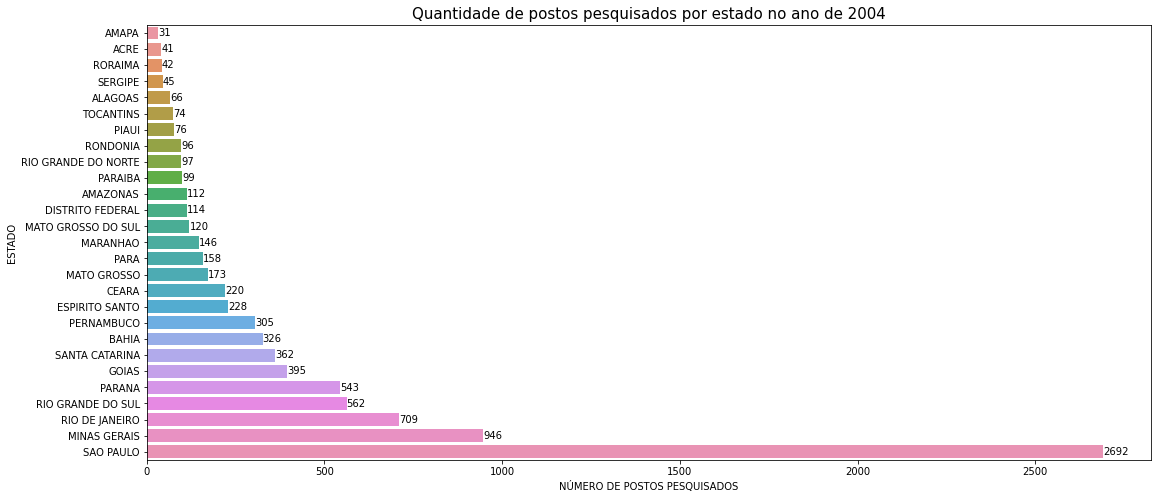

In [71]:
plt.figure(figsize=(18,8))
plt.title('Quantidade de postos pesquisados por estado no ano de 2004', size=15)
grafico_postos_2004 = sns.barplot(data = df_postos_2004, y ='ESTADO', x='NÚMERO DE POSTOS PESQUISADOS')
grafico_postos_2004.bar_label(grafico_postos_2004.containers[0]);

##### 2021

In [79]:
df_postos_2021 = df_gas.loc[df_gas['ANO']==2021]
df_postos_2021 = df_postos_2021.pivot_table(index='ESTADO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='mean').astype(int)
df_postos_2021 = df_postos_2021.sort_values(by='NÚMERO DE POSTOS PESQUISADOS')
df_postos_2021.reset_index(inplace = True)

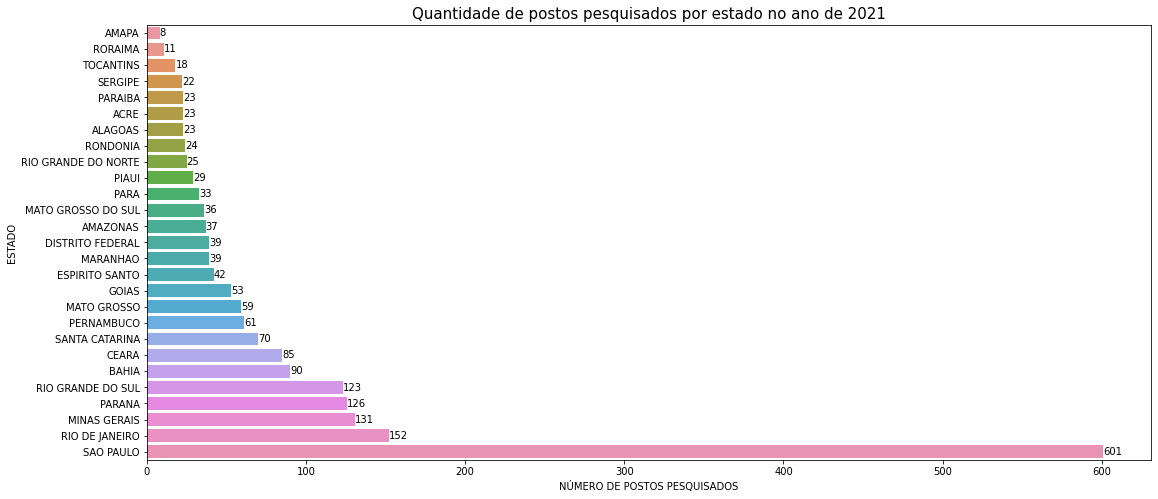

In [80]:
plt.figure(figsize=(18,8))
plt.title('Quantidade de postos pesquisados por estado no ano de 2021', size=15)
grafico_postos_2021 = sns.barplot(data = df_postos_2021, y ='ESTADO', x='NÚMERO DE POSTOS PESQUISADOS')
grafico_postos_2021.bar_label(grafico_postos_2021.containers[0]);

##### Todos os anos

In [122]:
df_postos = df_gas.pivot_table(index='ANO', values='NÚMERO DE POSTOS PESQUISADOS', aggfunc='mean').astype(int)
df_postos = df_postos.reset_index()

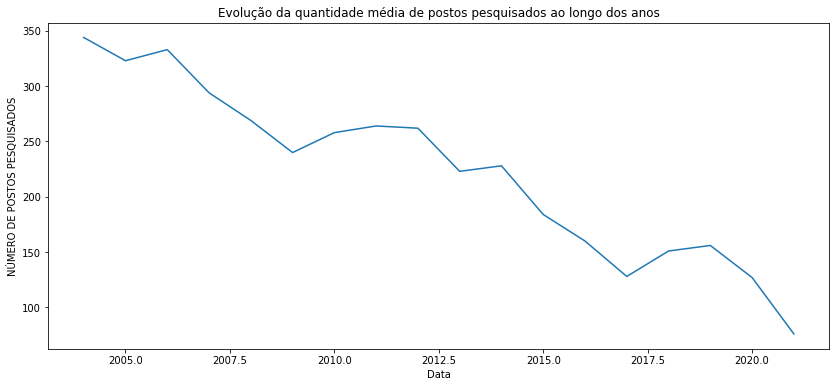

In [125]:
plt.figure(figsize=(14,6))
ax = sns.lineplot(data=df_postos, x='ANO', y='NÚMERO DE POSTOS PESQUISADOS')

ax.set_title('Evolução da quantidade média de postos pesquisados ao longo dos anos')
ax.set_ylabel('NÚMERO DE POSTOS PESQUISADOS')
ax.set_xlabel('Data');

### Ver qual o estado que mais/menos aumentou o valor médio do PREÇO MÉDIO REVENDA ano a ano por Região e plotar um gráfico comparando os dois. A FAZER

In [60]:
df_gas.head(3)

DATA INICIAL DATA FINAL        REGIÃO            ESTADO           PRODUTO  \
0   2004-05-09 2004-05-15  CENTRO OESTE  DISTRITO FEDERAL  ETANOL HIDRATADO   
1   2004-05-09 2004-05-15  CENTRO OESTE             GOIAS  ETANOL HIDRATADO   
2   2004-05-09 2004-05-15  CENTRO OESTE       MATO GROSSO  ETANOL HIDRATADO   

   NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
0                           127              R$/l                1.288   
1                           387              R$/l                1.162   
2                           192              R$/l                1.389   

   DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
0                  0.016                  1.19                 1.350   
1                  0.114                  0.89                 1.449   
2                  0.097                  1.18                 1.760   

  MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA PREÇO MÉDIO DISTRIBUIÇÃO  \
0                0.463                     0.012                    0.825   
1                0.399                     0.098                    0.763   
2                0.419                     0.070                     0.97   

  DESVIO PADRÃO DISTRIBUIÇÃO PREÇO MÍNIMO DISTRIBUIÇÃO  \
0                       0.11                    0.4201   
1                      0.088                    0.5013   
2                      0.095                    0.5614   

  PREÇO MÁXIMO DISTRIBUIÇÃO COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
0                    0.9666                         0.133  2004    5  
1                      1.05                         0.115  2004    5  
2                     1.161                         0.098  2004    5

In [64]:
df_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM']
df_gasolina.nlargest(1, 'PREÇO MÁXIMO REVENDA')

DATA INICIAL DATA FINAL REGIÃO ESTADO         PRODUTO  \
119629   2021-03-14 2021-03-20  NORTE   ACRE  GASOLINA COMUM   

        NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
119629                            10              R$/l                6.688   

        DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
119629                  0.011                  6.67                   6.7   

       MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
119629                  NaN                     0.002   

       PREÇO MÉDIO DISTRIBUIÇÃO DESVIO PADRÃO DISTRIBUIÇÃO  \
119629                      NaN                        NaN   

       PREÇO MÍNIMO DISTRIBUIÇÃO PREÇO MÁXIMO DISTRIBUIÇÃO  \
119629                       NaN                       NaN   

       COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
119629                           NaN  2021    3

In [65]:
df_gasolina = df_gas[df_gas['PRODUTO']=='GASOLINA COMUM']
df_gasolina.nsmallest(1, 'PREÇO MÍNIMO REVENDA')

DATA INICIAL DATA FINAL   REGIÃO     ESTADO         PRODUTO  \
18242   2008-10-05 2008-10-11  SUDESTE  SAO PAULO  GASOLINA COMUM   

       NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
18242                          2389              R$/l                2.408   

       DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
18242                  0.097                  1.39                   2.7   

      MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA PREÇO MÉDIO DISTRIBUIÇÃO  \
18242                0.311                      0.04                    2.097   

      DESVIO PADRÃO DISTRIBUIÇÃO PREÇO MÍNIMO DISTRIBUIÇÃO  \
18242                      0.044                      1.95   

      PREÇO MÁXIMO DISTRIBUIÇÃO COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
18242                    2.3341                         0.021  2008   10

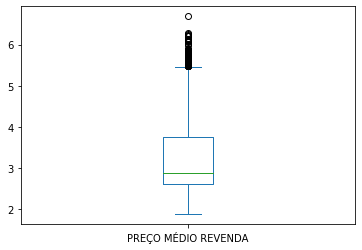

In [66]:
df_gasolina.plot(y='PREÇO MÉDIO REVENDA', kind='box');

In [46]:
df_gasolina_2004 = df_gas[(df_gas['PRODUTO']=='GASOLINA COMUM')&(df_gas['ANO']==2004)]
df_etanol_2004 = df_gas[(df_gas['PRODUTO']=='ETANOL HIDRATADO')&(df_gas['ANO']==2004)]
df_glp_2004 = df_gas[(df_gas['PRODUTO']=='GLP')&(df_gas['ANO']==2004)]
df_gnv_2004 = df_gas[(df_gas['PRODUTO']=='GNV')&(df_gas['ANO']==2004)]
df_diesel_2004 = df_gas[(df_gas['PRODUTO']=='ÓLEO DIESEL')&(df_gas['ANO']==2004)]
df_diesels10_2021 = df_gas[(df_gas['PRODUTO']=='ÓLEO DIESEL S10')&(df_gas['ANO']==2013)]

In [49]:
df_gasolina_2004.nsmallest(1,'PREÇO MÍNIMO REVENDA') #SP



DATA INICIAL DATA FINAL   REGIÃO     ESTADO         PRODUTO  \
12168   2004-05-30 2004-06-05  SUDESTE  SAO PAULO  GASOLINA COMUM   

       NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
12168                          4139              R$/l                1.912   

       DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
12168                  0.094                 1.529                 2.199   

      MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA PREÇO MÉDIO DISTRIBUIÇÃO  \
12168                0.235                     0.049                    1.677   

      DESVIO PADRÃO DISTRIBUIÇÃO PREÇO MÍNIMO DISTRIBUIÇÃO  \
12168                      0.068                      1.39   

      PREÇO MÁXIMO DISTRIBUIÇÃO COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
12168                    1.9733                         0.041  2004    6

In [50]:
df_gasolina_2004.nlargest(1,'PREÇO MÁXIMO REVENDA') #ACRE

DATA INICIAL DATA FINAL REGIÃO ESTADO         PRODUTO  \
12698   2004-10-17 2004-10-23  NORTE   ACRE  GASOLINA COMUM   

       NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
12698                            50              R$/l                2.619   

       DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
12698                  0.179                   2.4                   3.1   

      MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA PREÇO MÉDIO DISTRIBUIÇÃO  \
12698                0.601                     0.068                    2.018   

      DESVIO PADRÃO DISTRIBUIÇÃO PREÇO MÍNIMO DISTRIBUIÇÃO  \
12698                      0.044                     1.922   

      PREÇO MÁXIMO DISTRIBUIÇÃO COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
12698                    2.0675                         0.022  2004   10

In [41]:
df_gasolina_2021 = df_gas[(df_gas['PRODUTO']=='GASOLINA COMUM')&(df_gas['ANO']==2021)]
df_etanol_2021 = df_gas[(df_gas['PRODUTO']=='ETANOL HIDRATADO')&(df_gas['ANO']==2021)]
df_glp_2021 = df_gas[(df_gas['PRODUTO']=='GLP')&(df_gas['ANO']==2021)]
df_gnv_2021 = df_gas[(df_gas['PRODUTO']=='GNV')&(df_gas['ANO']==2021)]
df_diesel_2021 = df_gas[(df_gas['PRODUTO']=='ÓLEO DIESEL')&(df_gas['ANO']==2021)]
df_diesels10_2021 = df_gas[(df_gas['PRODUTO']=='ÓLEO DIESEL S10')&(df_gas['ANO']==2021)]

In [58]:
df_gasolina_2021.nsmallest(1,'PREÇO MÍNIMO REVENDA') #SP
# df_gasolina_2021.nlargest(1,'PREÇO MÍNIMO REVENDA')

DATA INICIAL DATA FINAL   REGIÃO     ESTADO         PRODUTO  \
117707   2020-12-27 2021-01-02  SUDESTE  SAO PAULO  GASOLINA COMUM   

        NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
117707                           740              R$/l                4.235   

        DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
117707                  0.205                 3.099                 4.999   

       MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
117707             -99999.0                     0.048   

       PREÇO MÉDIO DISTRIBUIÇÃO DESVIO PADRÃO DISTRIBUIÇÃO  \
117707                 -99999.0                   -99999.0   

       PREÇO MÍNIMO DISTRIBUIÇÃO PREÇO MÁXIMO DISTRIBUIÇÃO  \
117707                  -99999.0                  -99999.0   

       COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
117707                      -99999.0  2021    1

In [52]:
df_gasolina_2021.nlargest(1,'PREÇO MÁXIMO REVENDA') #ACRE

DATA INICIAL DATA FINAL REGIÃO ESTADO         PRODUTO  \
120699   2021-04-25 2021-05-01  NORTE   ACRE  GASOLINA COMUM   

        NÚMERO DE POSTOS PESQUISADOS UNIDADE DE MEDIDA  PREÇO MÉDIO REVENDA  \
120699                            39              R$/l                6.258   

        DESVIO PADRÃO REVENDA  PREÇO MÍNIMO REVENDA  PREÇO MÁXIMO REVENDA  \
120699                  0.328                  5.99                  6.89   

       MARGEM MÉDIA REVENDA  COEF DE VARIAÇÃO REVENDA  \
120699             -99999.0                     0.052   

       PREÇO MÉDIO DISTRIBUIÇÃO DESVIO PADRÃO DISTRIBUIÇÃO  \
120699                 -99999.0                   -99999.0   

       PREÇO MÍNIMO DISTRIBUIÇÃO PREÇO MÁXIMO DISTRIBUIÇÃO  \
120699                  -99999.0                  -99999.0   

       COEF DE VARIAÇÃO DISTRIBUIÇÃO   ANO  MÊS  
120699                      -99999.0  2021    5

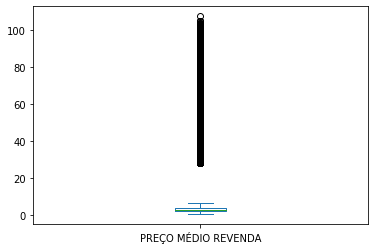

In [62]:
df_gas.plot(y='PREÇO MÉDIO REVENDA', kind='box');